# LAPD Online PDFS

This notebook provides an example of searching the Internet Archive Wayback machine for archival snapshots of PDFs that are likely to contain policy manuals. It uses the [wayback](https://wayback.readthedocs.io/) Python extension to talk to the Internet Archive's [CDX API](https://archive.org/services/docs/api/wayback-cdx-server.html).

## Setup

Until [this bug](https://github.com/edgi-govdata-archiving/wayback/issues/88) is fixed we need to install this version of the wayback library:

In [ ]:
!pip install git+https://github.com/edsu/wayback.git@t88-invalid-month

Now we need a client to talk to the CDX API:

In [2]:
from wayback import WaybackClient

ia = WaybackClient()

The [pandas](https://pandas.pydata.org/) library is useful for working with the results of the CDX API, since it will turn each result into a row in a DataFrame and make it easy to analyze.

In [3]:
import pandas

## Get Snapshots

First lets query for all the snapshots from `lapdonline.org` and its subdomains:

In [4]:
lapdonline_org = pandas.DataFrame(ia.search('lapdonline.org', matchType='domain'))
lapdonline_org

,key,timestamp,url,mime_type,status_code,digest,length,raw_url,view_url
0,"org,lapdonline)/",1998-12-02 19:06:15+00:00,http://www.lapdonline.org/,text/html,200.0,3IVDSMR5VHCYSTPYC55AK2M66CJ6C4QE,1123.0,http://web.archive.org/web/19981202190615id_/h...,http://web.archive.org/web/19981202190615/http...
1,"org,lapdonline)/",1998-12-12 03:04:51+00:00,http://www.lapdonline.org/,text/html,200.0,2GQOTMASA7PZOKDYSLJVHVRPKIUCZI4I,938.0,http://web.archive.org/web/19981212030451id_/h...,http://web.archive.org/web/19981212030451/http...
2,"org,lapdonline)/",1999-02-04 02:58:59+00:00,http://www.lapdonline.org/,text/html,200.0,2GQOTMASA7PZOKDYSLJVHVRPKIUCZI4I,945.0,http://web.archive.org/web/19990204025859id_/h...,http://web.archive.org/web/19990204025859/http...
3,"org,lapdonline)/",1999-02-08 01:44:15+00:00,http://www.lapdonline.org/,text/html,200.0,2GQOTMASA7PZOKDYSLJVHVRPKIUCZI4I,943.0,http://web.archive.org/web/19990208014415id_/h...,http://web.archive.org/web/19990208014415/http...
4,"org,lapdonline)/",1999-04-22 08:56:47+00:00,http://www.lapdonline.org/,text/html,200.0,2GQOTMASA7PZOKDYSLJVHVRPKIUCZI4I,933.0,http://web.archive.org/web/19990422085647id_/h...,http://web.archive.org/web/19990422085647/http...
...,...,...,...,...,...,...,...,...,...
963229,"org,lapdonline,ww)/home/news_view/68006",2021-09-17 22:54:11+00:00,http://ww.lapdonline.org/home/news_view/68006,text/html,200.0,YHBBKP3H6ZUI2YRJFTD2BD26DBTSO2QJ,8716.0,http://web.archive.org/web/20210917225411id_/h...,http://web.archive.org/web/20210917225411/http...
963230,"org,lapdonline,ww)/home/news_view/68008",2021-09-17 23:22:53+00:00,http://ww.lapdonline.org/home/news_view/68008,text/html,200.0,EOOJJ4DYEEPGILF2YIYEJ64UM7MZ3IPS,8467.0,http://web.archive.org/web/20210917232253id_/h...,http://web.archive.org/web/20210917232253/http...
963231,"org,lapdonline,ww)/home/news_view/68009",2021-09-17 22:27:56+00:00,http://ww.lapdonline.org/home/news_view/68009,text/html,200.0,APUIN33AVIDOD2CTY7STZN26OX7MQSFH,8164.0,http://web.archive.org/web/20210917222756id_/h...,http://web.archive.org/web/20210917222756/http...
963232,"org,lapdonline,ww)/internal_affairs_group",2021-09-17 23:02:45+00:00,http://ww.lapdonline.org/internal_affairs_group,text/html,200.0,2GBZ4XJFKSZU4YUR2OLAVKHCGVHL2UAH,9882.0,http://web.archive.org/web/20210917230245id_/h...,http://web.archive.org/web/20210917230245/http...


What hostnames are present in this data?

In [16]:
from urllib.parse import urlparse

lapdonline_org.url.apply(lambda s: urlparse(s).netloc).value_counts()

www.lapdonline.org                      745623
lapdonline.org                          215617
lapd-assets.lapdonline.org                1778
lapd.lapdonline.org                         93
nkca.ucla.edwww.lapdonline.org              51
assets.lapdonline.org                       50
lapd-lapd-lapd-assets.lapdonline.org        12
ww.lapdonline.org                            9
wuv.lapdonline.org                           1
Name: url, dtype: int64

Since the `domain` scopeType has been known not to return all results, lets look for each of these using the `prefix` scopeType.

In [23]:
hostnames = list(lapdonline_org.url.apply(lambda s: urlparse(s).netloc).unique())
hostnames

['www.lapdonline.org',
 'lapdonline.org',
 'assets.lapdonline.org',
 'nkca.ucla.edwww.lapdonline.org',
 'lapd.lapdonline.org',
 'lapd-assets.lapdonline.org',
 'lapd-lapd-lapd-assets.lapdonline.org',
 'wuv.lapdonline.org',
 'ww.lapdonline.org']

One detail is that the results for `www.lapdonline.org` are the same as for `lapdonline.org`, so we can remove that:

In [24]:
hostnames.pop(0)
hostnames

['lapdonline.org',
 'assets.lapdonline.org',
 'nkca.ucla.edwww.lapdonline.org',
 'lapd.lapdonline.org',
 'lapd-assets.lapdonline.org',
 'lapd-lapd-lapd-assets.lapdonline.org',
 'wuv.lapdonline.org',
 'ww.lapdonline.org']

I also happened to notice that currently they are linking to PDF files at `lapdonlinestrgeacc.blob.core.usgovcloudapi.net` for example if you look at some of the links on https://www.lapdonline.org/reference-library/ so lets add that since it isn't a subdomain of `lapdonline.org`.

In [63]:
hostnames.append('lapdonlinestrgeacc.blob.core.usgovcloudapi.net')
hostnames

['lapdonline.org',
 'assets.lapdonline.org',
 'nkca.ucla.edwww.lapdonline.org',
 'lapd.lapdonline.org',
 'lapd-assets.lapdonline.org',
 'lapd-lapd-lapd-assets.lapdonline.org',
 'wuv.lapdonline.org',
 'ww.lapdonline.org',
 'lapdonlinestrgeacc.blob.core.usgovcloudapi.net']

In [64]:
def get_df(hostname):
    return pandas.DataFrame(ia.search(hostname, matchType='prefix'))

df = pandas.concat([get_df(host) for host in hostnames])
df

,key,timestamp,url,mime_type,status_code,digest,length,raw_url,view_url
0,"org,lapdonline)/",1998-12-02 19:06:15+00:00,http://www.lapdonline.org/,text/html,200.0,3IVDSMR5VHCYSTPYC55AK2M66CJ6C4QE,1123.0,http://web.archive.org/web/19981202190615id_/h...,http://web.archive.org/web/19981202190615/http...
1,"org,lapdonline)/",1998-12-12 03:04:51+00:00,http://www.lapdonline.org/,text/html,200.0,2GQOTMASA7PZOKDYSLJVHVRPKIUCZI4I,938.0,http://web.archive.org/web/19981212030451id_/h...,http://web.archive.org/web/19981212030451/http...
2,"org,lapdonline)/",1999-02-04 02:58:59+00:00,http://www.lapdonline.org/,text/html,200.0,2GQOTMASA7PZOKDYSLJVHVRPKIUCZI4I,945.0,http://web.archive.org/web/19990204025859id_/h...,http://web.archive.org/web/19990204025859/http...
3,"org,lapdonline)/",1999-02-08 01:44:15+00:00,http://www.lapdonline.org/,text/html,200.0,2GQOTMASA7PZOKDYSLJVHVRPKIUCZI4I,943.0,http://web.archive.org/web/19990208014415id_/h...,http://web.archive.org/web/19990208014415/http...
4,"org,lapdonline)/",1999-04-22 08:56:47+00:00,http://www.lapdonline.org/,text/html,200.0,2GQOTMASA7PZOKDYSLJVHVRPKIUCZI4I,933.0,http://web.archive.org/web/19990422085647id_/h...,http://web.archive.org/web/19990422085647/http...
...,...,...,...,...,...,...,...,...,...
20535,"net,usgovcloudapi,core,blob,lapdonlinestrgeacc...",2022-09-18 08:31:14+00:00,https://lapdonlinestrgeacc.blob.core.usgovclou...,application/xml,505.0,ZWPSDUWQQO6G4RJ46OSOSYX7GYHKVQZB,660.0,http://web.archive.org/web/20220918083114id_/h...,http://web.archive.org/web/20220918083114/http...
20536,"net,usgovcloudapi,core,blob,lapdonlinestrgeacc...",2022-09-18 23:57:09+00:00,https://lapdonlinestrgeacc.blob.core.usgovclou...,application/xml,505.0,TFCK2V2CVXQS57GOJMFM2254X3J72ZGW,660.0,http://web.archive.org/web/20220918235709id_/h...,http://web.archive.org/web/20220918235709/http...
20537,"net,usgovcloudapi,core,blob,lapdonlinestrgeacc...",2022-09-19 09:33:08+00:00,https://lapdonlinestrgeacc.blob.core.usgovclou...,application/xml,505.0,EO7QKMER5N4RXSITW34OXRXIM2Y52YKE,656.0,http://web.archive.org/web/20220919093308id_/h...,http://web.archive.org/web/20220919093308/http...
20538,"net,usgovcloudapi,core,blob,lapdonlinestrgeacc...",2022-09-20 02:30:06+00:00,https://lapdonlinestrgeacc.blob.core.usgovclou...,application/xml,505.0,RNO46W7NVTPUIWJPAN7AT4TFNCTANVYQ,656.0,http://web.archive.org/web/20220920023006id_/h...,http://web.archive.org/web/20220920023006/http...


## PDFs

How many of the 1,120,030 snapshots have a `pdf` mime_type?

In [65]:
pdfs = df[df.mime_type.str.match('.*pdf')]
pdfs

,key,timestamp,url,mime_type,status_code,digest,length,raw_url,view_url
6111,"org,lapdonline)/2010_archives/pdf_view/45725",2011-12-21 05:42:52+00:00,http://lapdonline.org/2010_archives/pdf_view/4...,application/pdf,200.0,J4N2H7ESDITXCRJXENEUTMBAZTFKC3PJ,449776.0,http://web.archive.org/web/20111221054252id_/h...,http://web.archive.org/web/20111221054252/http...
6112,"org,lapdonline)/2010_archives/pdf_view/45725",2012-05-23 00:14:43+00:00,http://lapdonline.org/2010_archives/pdf_view/4...,application/pdf,200.0,J4N2H7ESDITXCRJXENEUTMBAZTFKC3PJ,449777.0,http://web.archive.org/web/20120523001443id_/h...,http://web.archive.org/web/20120523001443/http...
6113,"org,lapdonline)/2010_archives/pdf_view/45725",2012-05-25 10:14:07+00:00,http://lapdonline.org/2010_archives/pdf_view/4...,application/pdf,200.0,J4N2H7ESDITXCRJXENEUTMBAZTFKC3PJ,449776.0,http://web.archive.org/web/20120525101407id_/h...,http://web.archive.org/web/20120525101407/http...
6114,"org,lapdonline)/2010_archives/pdf_view/45725",2012-05-28 15:26:33+00:00,http://lapdonline.org/2010_archives/pdf_view/4...,application/pdf,200.0,J4N2H7ESDITXCRJXENEUTMBAZTFKC3PJ,449777.0,http://web.archive.org/web/20120528152633id_/h...,http://web.archive.org/web/20120528152633/http...
6115,"org,lapdonline)/2010_archives/pdf_view/45725",2012-06-04 11:02:27+00:00,http://lapdonline.org/2010_archives/pdf_view/4...,application/pdf,200.0,J4N2H7ESDITXCRJXENEUTMBAZTFKC3PJ,449778.0,http://web.archive.org/web/20120604110227id_/h...,http://web.archive.org/web/20120604110227/http...
...,...,...,...,...,...,...,...,...,...
19750,"net,usgovcloudapi,core,blob,lapdonlinestrgeacc...",2022-08-26 21:32:26+00:00,https://lapdonlinestrgeacc.blob.core.usgovclou...,application/pdf,200.0,W4TF5VPZPJO4QBZMS6D5CGR2VIQDHHEF,452241.0,http://web.archive.org/web/20220826213226id_/h...,http://web.archive.org/web/20220826213226/http...
19816,"net,usgovcloudapi,core,blob,lapdonlinestrgeacc...",2022-08-24 17:25:32+00:00,https://lapdonlinestrgeacc.blob.core.usgovclou...,application/pdf,200.0,NAM3JWW2D2EBN5PHOBKWKDDVTVBUPCEQ,107106.0,http://web.archive.org/web/20220824172532id_/h...,http://web.archive.org/web/20220824172532/http...
19822,"net,usgovcloudapi,core,blob,lapdonlinestrgeacc...",2022-09-13 00:37:02+00:00,https://lapdonlinestrgeacc.blob.core.usgovclou...,application/pdf,200.0,GQ5SIGZFKDJU7ZASIJEDVZ3ASMUZKWL4,106884.0,http://web.archive.org/web/20220913003702id_/h...,http://web.archive.org/web/20220913003702/http...
19823,"net,usgovcloudapi,core,blob,lapdonlinestrgeacc...",2022-09-14 22:31:23+00:00,https://lapdonlinestrgeacc.blob.core.usgovclou...,application/pdf,200.0,DG6RACZQ34GMJ3DEIYUKWTXABGN2E6WF,105884.0,http://web.archive.org/web/20220914223123id_/h...,http://web.archive.org/web/20220914223123/http...


## URLs

How many distinct URLs are there in these 72,199 snapshots?

In [66]:
urls = pdfs.url.unique()
len(urls)

16541

What are the top 25 URLs have been collected the most?

In [67]:
pdfs.url.value_counts().head(25)

http://assets.lapdonline.org/assets/pdf/Harvard-LAPD%20Study.pdf                         223
http://assets.lapdonline.org/assets/pdf/final_consent_decree.pdf                         185
http://lapd-assets.lapdonline.org/assets/pdf/cityprof.pdf                                156
http://assets.lapdonline.org/assets/pdf/cityprof.pdf                                     114
http://assets.lapdonline.org/assets/pdf/Biased%20Policing%20Rpt%20and%20Tables_Q3.pdf    111
http://assets.lapdonline.org/assets/pdf/Form%20802%20rev-February%2011.pdf                82
http://assets.lapdonline.org/assets/pdf/SO_40.pdf                                         79
http://www.lapdonline.org/assets/pdf/cityprof.pdf                                         76
http://www.lapdonline.org/assets/pdf/soeprof.pdf                                          67
http://www.lapdonline.org/assets/pdf/hwdprof.pdf                                          67
http://www.lapdonline.org/assets/pdf/wilprof.pdf                      

## Collecting Over Time

What does the Internet Archive's collection of LAPD PDFs look like over time?

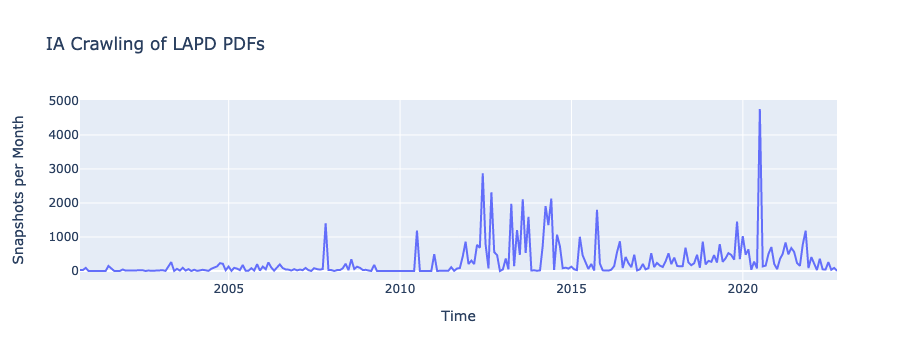

In [68]:
import plotly.express as xp

counts = pdfs.set_index('timestamp').resample('M').count()['key']
fig = xp.line(counts, title='IA Crawling of LAPD PDFs', labels={"value": "Snapshots per Month", "timestamp": "Time"})
fig = fig.update_layout(showlegend=False)
fig

Has there been any data collection in 2022?

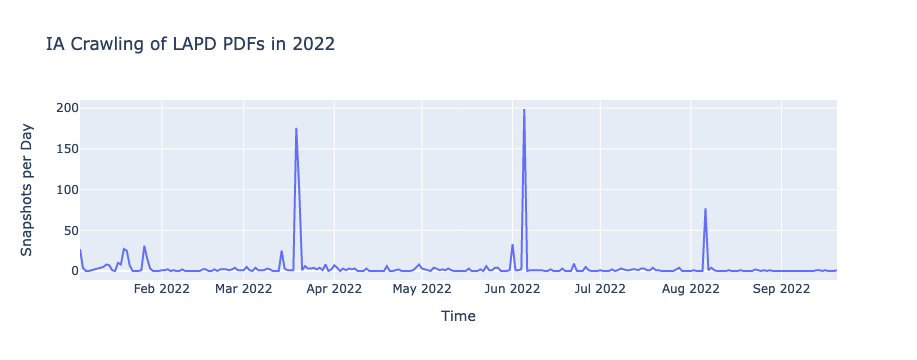

In [69]:
from datetime import datetime, timezone

counts_2022 = (
    pdfs[pdfs.timestamp > datetime(2022, 1, 1, tzinfo=timezone.utc)]
      .set_index('timestamp')
      .resample('D')
      .count()['key']
)

fig = xp.line(
  counts_2022, 
  title='IA Crawling of LAPD PDFs in 2022',
  labels={"value": "Snapshots per Day", "timestamp": "Time"}
)

fig = fig.update_layout(showlegend=False)
fig

## Unique Content

Since the CDX API returns a *digest* for each capture we can also see how much unique PDF content is in there. This should be less than the number of unique PDF URLs (16,541)

In [70]:
len(pdfs.digest.unique())

10437

It should be possible to see how PDFs have moved around on the website over time.

In [72]:
uniq_pdfs = pdfs.set_index('digest')
uniq_pdfs

,key,timestamp,url,mime_type,status_code,length,raw_url,view_url
digest,,,,,,,,
J4N2H7ESDITXCRJXENEUTMBAZTFKC3PJ,"org,lapdonline)/2010_archives/pdf_view/45725",2011-12-21 05:42:52+00:00,http://lapdonline.org/2010_archives/pdf_view/4...,application/pdf,200.0,449776.0,http://web.archive.org/web/20111221054252id_/h...,http://web.archive.org/web/20111221054252/http...
J4N2H7ESDITXCRJXENEUTMBAZTFKC3PJ,"org,lapdonline)/2010_archives/pdf_view/45725",2012-05-23 00:14:43+00:00,http://lapdonline.org/2010_archives/pdf_view/4...,application/pdf,200.0,449777.0,http://web.archive.org/web/20120523001443id_/h...,http://web.archive.org/web/20120523001443/http...
J4N2H7ESDITXCRJXENEUTMBAZTFKC3PJ,"org,lapdonline)/2010_archives/pdf_view/45725",2012-05-25 10:14:07+00:00,http://lapdonline.org/2010_archives/pdf_view/4...,application/pdf,200.0,449776.0,http://web.archive.org/web/20120525101407id_/h...,http://web.archive.org/web/20120525101407/http...
J4N2H7ESDITXCRJXENEUTMBAZTFKC3PJ,"org,lapdonline)/2010_archives/pdf_view/45725",2012-05-28 15:26:33+00:00,http://lapdonline.org/2010_archives/pdf_view/4...,application/pdf,200.0,449777.0,http://web.archive.org/web/20120528152633id_/h...,http://web.archive.org/web/20120528152633/http...
J4N2H7ESDITXCRJXENEUTMBAZTFKC3PJ,"org,lapdonline)/2010_archives/pdf_view/45725",2012-06-04 11:02:27+00:00,http://lapdonline.org/2010_archives/pdf_view/4...,application/pdf,200.0,449778.0,http://web.archive.org/web/20120604110227id_/h...,http://web.archive.org/web/20120604110227/http...
...,...,...,...,...,...,...,...,...
W4TF5VPZPJO4QBZMS6D5CGR2VIQDHHEF,"net,usgovcloudapi,core,blob,lapdonlinestrgeacc...",2022-08-26 21:32:26+00:00,https://lapdonlinestrgeacc.blob.core.usgovclou...,application/pdf,200.0,452241.0,http://web.archive.org/web/20220826213226id_/h...,http://web.archive.org/web/20220826213226/http...
NAM3JWW2D2EBN5PHOBKWKDDVTVBUPCEQ,"net,usgovcloudapi,core,blob,lapdonlinestrgeacc...",2022-08-24 17:25:32+00:00,https://lapdonlinestrgeacc.blob.core.usgovclou...,application/pdf,200.0,107106.0,http://web.archive.org/web/20220824172532id_/h...,http://web.archive.org/web/20220824172532/http...
GQ5SIGZFKDJU7ZASIJEDVZ3ASMUZKWL4,"net,usgovcloudapi,core,blob,lapdonlinestrgeacc...",2022-09-13 00:37:02+00:00,https://lapdonlinestrgeacc.blob.core.usgovclou...,application/pdf,200.0,106884.0,http://web.archive.org/web/20220913003702id_/h...,http://web.archive.org/web/20220913003702/http...


In [84]:
doc = uniq_pdfs[uniq_pdfs.index == 'J4N2H7ESDITXCRJXENEUTMBAZTFKC3PJ']
doc = doc.sort_values('timestamp')
for i, row in doc.iterrows():
    print(row.timestamp, row.url)

2011-12-21 05:42:52+00:00 http://lapdonline.org/2010_archives/pdf_view/45725
2012-05-23 00:14:43+00:00 http://lapdonline.org/2010_archives/pdf_view/45725
2012-05-25 10:14:07+00:00 http://lapdonline.org/2010_archives/pdf_view/45725
2012-05-28 15:26:33+00:00 http://lapdonline.org/2010_archives/pdf_view/45725
2012-06-04 11:02:27+00:00 http://lapdonline.org/2010_archives/pdf_view/45725
2012-08-21 10:53:02+00:00 http://www.lapdonline.org/2010_archives/pdf_view/45725
2013-03-05 10:43:58+00:00 http://www.lapdonline.org/2010_archives/pdf_view/45725
2013-05-25 18:49:35+00:00 http://www.lapdonline.org/2010_archives/pdf_view/45725
2013-07-11 09:42:54+00:00 http://www.lapdonline.org/2010_archives/pdf_view/45725
2013-09-24 11:35:16+00:00 http://lapdonline.org/2010_archives/pdf_view/45725
2014-03-01 04:26:37+00:00 http://www.lapdonline.org/2010_archives/pdf_view/45725
2014-05-29 08:27:15+00:00 http://www.lapdonline.org/2010_archives/pdf_view/45725
2014-08-11 19:03:55+00:00 http://lapdonline.org/2010

It's worth highlighting how none of these URLs work anymore. But you can find them at the Internet Archive of course!

In [85]:
for i, row in doc.iterrows():
    print(row.timestamp, row.view_url)

2011-12-21 05:42:52+00:00 http://web.archive.org/web/20111221054252/http://lapdonline.org/2010_archives/pdf_view/45725
2012-05-23 00:14:43+00:00 http://web.archive.org/web/20120523001443/http://lapdonline.org/2010_archives/pdf_view/45725
2012-05-25 10:14:07+00:00 http://web.archive.org/web/20120525101407/http://lapdonline.org/2010_archives/pdf_view/45725
2012-05-28 15:26:33+00:00 http://web.archive.org/web/20120528152633/http://lapdonline.org/2010_archives/pdf_view/45725
2012-06-04 11:02:27+00:00 http://web.archive.org/web/20120604110227/http://lapdonline.org/2010_archives/pdf_view/45725
2012-08-21 10:53:02+00:00 http://web.archive.org/web/20120821105302/http://www.lapdonline.org/2010_archives/pdf_view/45725
2013-03-05 10:43:58+00:00 http://web.archive.org/web/20130305104358/http://www.lapdonline.org/2010_archives/pdf_view/45725
2013-05-25 18:49:35+00:00 http://web.archive.org/web/20130525184935/http://www.lapdonline.org/2010_archives/pdf_view/45725
2013-07-11 09:42:54+00:00 http://web